## Load Data-Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD


In [2]:
!pip install --upgrade numpy


In [3]:
df = pd.read_csv(r'C:\Users\sony\Downloads\forestfires.csv')

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0



## Data Preorosessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


                  data not have null values
                  data coulmns are 2 stirng , 8 float and 3 integer

In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


              
              Rain have very low values with sometimes high

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

            data not have duplicate rows



In [8]:
# need to drop sting coulmns to detect outlier
integer_coulmns = df.drop(df.columns[[2, 3]], axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2709da4de80>,
 'caps': [<matplotlib.lines.Line2D at 0x2709fa6b580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2709da4db20>,
 'medians': [<matplotlib.lines.Line2D at 0x2709fa6bc40>,
 'fliers': [<matplotlib.lines.Line2D at 0x2709fa6bfa0>,
 'means': []}

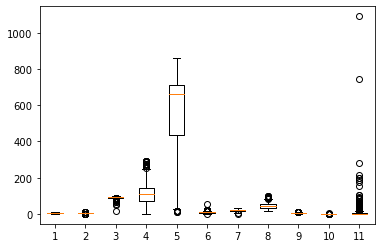

In [9]:
# visualization Boxplot to know columns have outlier or no
plt.boxplot(integer_coulmns)

                  data have outliers need to drop

In [10]:
integer_coulmns.shape

(517, 11)

                  data before drop outlier have 517 rows and 11 coulmns

In [11]:
#delet outlier by IQR that delet data out the box
numerical_features = integer_coulmns
# Q1 is the first quntile 25%
Q1 = numerical_features.quantile(0.25)
#Q3 is the third quntile 75%
Q3 = numerical_features.quantile(0.75)
#IQR is the defference between them
IQR = Q3 - Q1
#it's constant
iqr_multiplier = 1.5
# the way i detect the outlier that bellow iqr_multiplier * IQR and above it
outlier_mask = (numerical_features < (Q1 - iqr_multiplier * IQR)) | (numerical_features > (Q3 + iqr_multiplier * IQR))
# know index of cell i will drop
dropped_index = integer_coulmns[outlier_mask.any(axis=1)].index
# Remove rows with outliers
filtered_df = integer_coulmns[~outlier_mask.any(axis=1)]

In [12]:
filtered_df.shape

(316, 11)

              data after drop outlier 316 rows and 11 coulmns


## Data anylsis

In [13]:
# calculate average area for each month
area_month = df.groupby('month')['area'].mean()
# sort average for each month
sort=area_month.sort_values(ascending=False)
# reset index to rename coulmns
area=sort.reset_index()
# rename coulmns
area.columns = ['Month ', 'Average Area']
area

,Month,Average Area
0,may,19.240000
1,sep,17.942616
2,jul,14.369687
3,dec,13.330000
4,aug,12.489076
5,apr,8.891111
6,oct,6.638000
7,feb,6.275000
8,jun,5.841176
9,mar,4.356667


                   months may and sept are the high months average area

In [14]:
# calculate maximum temperature for each month
month = df.groupby('month')['temp'].max().sort_values(ascending=False)
# sort maximum for each month
sort2=month.sort_values(ascending=False)
# reset index to rename coulmns
month=sort2.reset_index()
# rename coulmns
month.columns = ['Month ', 'Temperature']
month


,Month,Temperature
0,aug,33.3
1,jul,30.2
2,sep,30.2
3,jun,28.0
4,oct,21.7
5,mar,18.8
6,may,18.0
7,apr,17.6
8,feb,15.7
9,nov,11.8


              months aug and jul are the high months in temperature

In [15]:
#calculate the average wind speed for each day
day = df.groupby('day')['wind'].mean()
# sort average wind for each month
speed=day.sort_values(ascending=False)
# reset index to rename coulmns
speeds=speed.reset_index()
# rename coulmns
speeds.columns = ['Day ', 'Wind']
speeds


,Day,Wind
0,fri,4.494118
1,tue,4.271875
2,sun,4.123158
3,wed,3.912963
4,sat,3.758333
5,mon,3.737838
6,thu,3.711475


                   Days fri and tue are the high Days average in wind speed

In [16]:
#calculate the average FFMC(represent moisture conditions for shaded litter fuels)  for each month
ffmc = df.groupby('month')['FFMC'].mean()
# sort average wind for each month
ffmcs=ffmc.sort_values(ascending=False)
# reset index to rename coulmns
ffmcMonth=ffmcs.reset_index()
# rename coulmns
ffmcMonth.columns = ['Month', 'FFMC']
ffmcMonth


,Month,FFMC
0,aug,92.336957
1,jul,91.328125
2,sep,91.243023
3,oct,90.453333
4,mar,89.444444
5,jun,89.429412
6,may,87.350000
7,apr,85.788889
8,dec,84.966667
9,feb,82.905000


                  month aug and jul are the high months average in ffmc

## Featue Extraction

In [17]:
# calculate correlations between target coulmn area and other columns
correlation = filtered_df.corr()['area']
print(correlation)

X      -0.024808
Y       0.046854
FFMC    0.070138
DMC     0.076413
DC      0.055411
ISI     0.030413
temp    0.071068
RH      0.026572
wind   -0.078028
rain         NaN
area    1.000000
Name: area, dtype: float64


         from correlation it appear that weak linear correlations between coulmns and area

In [18]:
filtered_df['rain'].unique()

array([0.])

In [19]:
# delet rain coulmns because all cells are zeros
filtered_df.drop(['rain'], axis=1)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.00
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.00
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.00
...,...,...,...,...,...,...,...,...,...,...
496,4,5,96.2,175.5,661.8,16.8,32.6,26,3.1,2.77
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,14.68
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.00
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.43


## neural network model





In [20]:
# encoding month and year
encode = pd.get_dummies(df, columns=['month', 'day'])
encode_data=encode.iloc[:, 11:]
encode_data

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
513,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
514,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
515,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [21]:
# make new data set with filter data and encode data
data = pd.concat([filtered_df,encode_data], axis=1)
data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,...,False,False,False,True,False,False,False,False,False,False
1,7.0,4.0,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,...,False,True,False,False,False,False,False,False,True,False
2,7.0,4.0,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,...,False,True,False,False,False,True,False,False,False,False
5,8.0,6.0,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,...,False,False,False,False,False,False,True,False,False,False
6,8.0,6.0,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False


            data have null values because encode data rows different from flitter data rows

In [22]:
# drop same rows that have outlier from encode data also
encode_data2 = encode.drop(dropped_index)
encode_data3 = encode_data2.iloc[:, 11:]
encode_data3

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
497,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
507,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
510,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [23]:
data2 = pd.concat([filtered_df,encode_data2], axis=1)
data2

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,True,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,True,False,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,False,True,False,False,False,True,False,False,False,False
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,False,False,False,False,False,False,True,False,False,False
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,4,5,96.2,175.5,661.8,16.8,32.6,26,3.1,0.0,...,False,False,False,False,True,False,False,False,False,False
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,...,False,False,False,False,False,False,False,False,True,False
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,False,False,False,True,False,False,False,False,False,False
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,...,False,False,False,True,False,False,False,False,False,False


In [24]:
data3=data2.drop(['rain'], axis=1)
data3

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.00,...,False,False,False,True,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.00,...,False,True,False,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.00,...,False,True,False,False,False,True,False,False,False,False
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.00,...,False,False,False,False,False,False,True,False,False,False
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.00,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,4,5,96.2,175.5,661.8,16.8,32.6,26,3.1,2.77,...,False,False,False,False,True,False,False,False,False,False
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,14.68,...,False,False,False,False,False,False,False,False,True,False
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.00,...,False,False,False,True,False,False,False,False,False,False
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.43,...,False,False,False,True,False,False,False,False,False,False


                   now rows are same

In [25]:
#normalization data using StandardScaler
from sklearn.preprocessing import  StandardScaler
scalar = StandardScaler()
scaled = scalar.fit_transform(data3)
data_scaled=pd.DataFrame(scaled)
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1.046633,0.643341,-3.082682,-1.617558,-2.062191,-1.350420,-2.368733,0.668623,1.882325,-0.619503,...,0.0,-0.189909,-0.777214,2.362908,-0.438694,-0.448911,-0.479137,-0.369717,-0.341479,-0.347228
1,1.046633,-0.461527,-0.667263,-1.441716,0.430356,-0.814618,-0.336178,-0.680004,-1.792500,-0.619503,...,0.0,5.265669,-0.777214,-0.423207,-0.438694,-0.448911,-0.479137,-0.369717,2.928439,-0.347228
2,1.046633,-0.461527,-0.667263,-1.283076,0.507544,-0.814618,-1.041350,-0.680004,-1.539064,-0.619503,...,0.0,5.265669,-0.777214,-0.423207,-0.438694,2.227614,-0.479137,-0.369717,-0.341479,-0.347228
3,1.509848,1.748209,0.265967,-0.487963,-0.354961,1.864391,0.534917,-0.979699,1.058658,-0.619503,...,0.0,-0.189909,-0.777214,-0.423207,-0.438694,-0.448911,2.087087,-0.369717,-0.341479,-0.347228
4,1.509848,1.748209,0.265967,-0.419156,-0.322005,-0.211841,0.928984,-1.129547,-0.398601,-0.619503,...,0.0,-0.189909,-0.777214,-0.423207,2.279491,-0.448911,-0.479137,-0.369717,-0.341479,-0.347228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,-0.343014,0.643341,2.406907,1.236055,0.398701,2.567631,2.691915,-1.204470,-0.398601,0.130931,...,0.0,-0.189909,-0.777214,-0.423207,2.279491,-0.448911,-0.479137,-0.369717,-0.341479,-0.347228
312,-0.806230,-0.461527,2.352011,1.343089,0.439463,1.730441,2.629694,-1.129547,-0.968832,3.357523,...,0.0,-0.189909,-0.777214,-0.423207,-0.438694,-0.448911,-0.479137,-0.369717,2.928439,-0.347228
313,-1.269445,-0.461527,-0.447679,1.071681,0.792443,-0.680668,1.302311,-0.080614,-0.081805,-0.619503,...,0.0,-0.189909,-0.777214,2.362908,-0.438694,-0.448911,-0.479137,-0.369717,-0.341479,-0.347228
314,0.583417,0.643341,-0.447679,1.071681,0.792443,-0.680668,-0.294697,1.492785,1.058658,-0.503009,...,0.0,-0.189909,-0.777214,2.362908,-0.438694,-0.448911,-0.479137,-0.369717,-0.341479,-0.347228


In [30]:
#deterime x and y to know how different coulmns affect on area column
# X is all data without target
X = data_scaled.drop(9, axis=1)
# y is the target only (area) with taking  the logarithm of the values
y = np.log1p(data_scaled[9]) 
# split the data into train and test set
# make 20% of data test and 80% train  by test and fail
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

#create a Sequential model (allow data flows sequentially through the neural network layers)
model = Sequential()
# add fully connected layer with 64 neurons
# activation function is non-linear match with number of coulmns
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
# add fully connected layer with 32 neurons
# activation function is non-linear
model.add(Dense(32, activation='relu'))
# add dropout layer to prevent overfitting
model.add(Dropout(0.3))
#add one layer
model.add(Dense(1))

# compile the model using  gradient descent optimization and mean squared error loss funcation
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

# train the model and determine batch size using try and failed
model.fit(X_train, y_train, epochs=50, batch_size=10)



Epoch 1/50
26/26 [==============================] - 0s 1ms/step - loss: 1.0983
Epoch 2/50
26/26 [==============================] - 0s 1ms/step - loss: 0.9229
Epoch 3/50
26/26 [==============================] - 0s 1ms/step - loss: 0.9989
Epoch 4/50
26/26 [==============================] - 0s 1ms/step - loss: 0.9651
Epoch 5/50
26/26 [==============================] - 0s 1ms/step - loss: 0.7371
Epoch 6/50
26/26 [==============================] - 0s 1ms/step - loss: 0.7602
Epoch 7/50
26/26 [==============================] - 0s 1ms/step - loss: 0.6965
Epoch 8/50
26/26 [==============================] - 0s 1ms/step - loss: 0.6346
Epoch 9/50
26/26 [==============================] - 0s 1ms/step - loss: 0.6555
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.6417
Epoch 11/50
26/26 [==============================] - 0s 1ms/step - loss: 0.5925
Epoch 12/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5992
Epoch 13/50
26/26 [==============================

In [31]:
#perdict using x-test
y_pred = model.predict(X_test)
#calculte mse
mse = mean_squared_error(y_test, y_pred)
mse

2/2 [==============================] - 0s 0s/step


0.20704380613227527

               difference between the predicted values and the actual values 0.2

                 Low mse represent that there is relationship between area columns and other columns